# WeatherPy
----

### FInal Observations
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

597


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# set up lists to hold response info
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lon = []
temp = []
wind = []

# Url components
url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key = "&appid=" + weather_api_key
units = "&units=imperial"

In [7]:
# Set up a counter for the print log
record = 0

# loop through cities, make requests and parse
for city in cities:
    try:
        target_url = (url + city + api_key + units)
        response = requests.get(target_url).json()
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        # Add to counter
        record += 1   
        print(f"Retrieved data for {city}.")
        print(target_url)
    # Exceptions for a city that is not found
    except:
        print(f"No data found for {city}.")      
    # Set the time sleep to kick in right before it gets to the call limit (60)
    if record % 59 == 0:
        time.sleep(2)
        
print("------------------")
print("Printing Complete.")

No data found for amderma.
Retrieved data for new norfolk.
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for geraldton.
http://api.openweathermap.org/data/2.5/weather?q=geraldton&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for illapel.
http://api.openweathermap.org/data/2.5/weather?q=illapel&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for ekangala.
http://api.openweathermap.org/data/2.5/weather?q=ekangala&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for ozgon.
Retrieved data for busselton.
http://api.openweathermap.org/data/2.5/weather?q=busselton&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kapaa.
http://api.openweathermap.org/data/2.5/weather?q=kapaa&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for camacha.
http://api.openweathermap.org/data/2.5/weather?q=camacha&appid=73df2cea8

Retrieved data for lorengau.
http://api.openweathermap.org/data/2.5/weather?q=lorengau&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for paita.
http://api.openweathermap.org/data/2.5/weather?q=paita&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for carballo.
http://api.openweathermap.org/data/2.5/weather?q=carballo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for nikolskoye.
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for shubarkuduk.
http://api.openweathermap.org/data/2.5/weather?q=shubarkuduk&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for esperance.
http://api.openweathermap.org/data/2.5/weather?q=esperance&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for pallasovka.
http://api.openweathermap.org/data/2.5/weather?q=pallasovka&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Ret

Retrieved data for vrangel.
http://api.openweathermap.org/data/2.5/weather?q=vrangel&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for alyangula.
http://api.openweathermap.org/data/2.5/weather?q=alyangula&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for vaitupu.
Retrieved data for comodoro rivadavia.
http://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for cassilandia.
http://api.openweathermap.org/data/2.5/weather?q=cassilandia&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for hirara.
http://api.openweathermap.org/data/2.5/weather?q=hirara&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for mar del plata.
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for matamoros.
http://api.openweathermap.org/data/2.5/weather?q=matamoros&appid=

Retrieved data for saldanha.
http://api.openweathermap.org/data/2.5/weather?q=saldanha&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for el alto.
http://api.openweathermap.org/data/2.5/weather?q=el alto&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for anar darreh.
Retrieved data for sitka.
http://api.openweathermap.org/data/2.5/weather?q=sitka&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kibre mengist.
http://api.openweathermap.org/data/2.5/weather?q=kibre mengist&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for husavik.
http://api.openweathermap.org/data/2.5/weather?q=husavik&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for tunceli.
http://api.openweathermap.org/data/2.5/weather?q=tunceli&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for attawapiskat.
Retrieved data for tutoia.
http://api.openweathermap.org/data/2.5/weather?q=tutoia&appid=73df

Retrieved data for zabol.
http://api.openweathermap.org/data/2.5/weather?q=zabol&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for cayenne.
http://api.openweathermap.org/data/2.5/weather?q=cayenne&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kieta.
http://api.openweathermap.org/data/2.5/weather?q=kieta&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for pirapora.
http://api.openweathermap.org/data/2.5/weather?q=pirapora&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kodiak.
http://api.openweathermap.org/data/2.5/weather?q=kodiak&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for agadir.
http://api.openweathermap.org/data/2.5/weather?q=agadir&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for bairiki.
http://api.openweathermap.org/data/2.5/weather?q=bairiki&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for seydi.
http://api.

No data found for kuche.
Retrieved data for sao joao da barra.
http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for buta.
http://api.openweathermap.org/data/2.5/weather?q=buta&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for grand gaube.
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for pevek.
http://api.openweathermap.org/data/2.5/weather?q=pevek&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kanker.
http://api.openweathermap.org/data/2.5/weather?q=kanker&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for batangafo.
http://api.openweathermap.org/data/2.5/weather?q=batangafo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for katrineholm.
http://api.openweathermap.org/data/2.5/weather?q=katrineholm&appid=73df2cea878643f6b4c2ef

Retrieved data for bengkulu.
http://api.openweathermap.org/data/2.5/weather?q=bengkulu&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for salcedo.
http://api.openweathermap.org/data/2.5/weather?q=salcedo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for neuquen.
http://api.openweathermap.org/data/2.5/weather?q=neuquen&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for grindavik.
http://api.openweathermap.org/data/2.5/weather?q=grindavik&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for guymon.
http://api.openweathermap.org/data/2.5/weather?q=guymon&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for roznava.
http://api.openweathermap.org/data/2.5/weather?q=roznava&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for markala.
http://api.openweathermap.org/data/2.5/weather?q=markala&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for firm

Retrieved data for torquay.
http://api.openweathermap.org/data/2.5/weather?q=torquay&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for sakaiminato.
http://api.openweathermap.org/data/2.5/weather?q=sakaiminato&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for talara.
http://api.openweathermap.org/data/2.5/weather?q=talara&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for whakatane.
http://api.openweathermap.org/data/2.5/weather?q=whakatane&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for makow mazowiecki.
http://api.openweathermap.org/data/2.5/weather?q=makow mazowiecki&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for shar.
http://api.openweathermap.org/data/2.5/weather?q=shar&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for zaozerne.
http://api.openweathermap.org/data/2.5/weather?q=zaozerne&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Ret

Retrieved data for mugur-aksy.
http://api.openweathermap.org/data/2.5/weather?q=mugur-aksy&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for pochutla.
http://api.openweathermap.org/data/2.5/weather?q=pochutla&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for aykhal.
http://api.openweathermap.org/data/2.5/weather?q=aykhal&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for ciudad bolivar.
http://api.openweathermap.org/data/2.5/weather?q=ciudad bolivar&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for corralillo.
http://api.openweathermap.org/data/2.5/weather?q=corralillo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for ibirapitanga.
http://api.openweathermap.org/data/2.5/weather?q=ibirapitanga&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for mahina.
http://api.openweathermap.org/data/2.5/weather?q=mahina&appid=73df2cea878643f6b4c2ef4447fe0783&units=im

Retrieved data for mayma.
http://api.openweathermap.org/data/2.5/weather?q=mayma&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for san cristobal.
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for banjar.
http://api.openweathermap.org/data/2.5/weather?q=banjar&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for mujiayingzi.
http://api.openweathermap.org/data/2.5/weather?q=mujiayingzi&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kota belud.
http://api.openweathermap.org/data/2.5/weather?q=kota belud&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for faanui.
http://api.openweathermap.org/data/2.5/weather?q=faanui&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for smoky lake.
http://api.openweathermap.org/data/2.5/weather?q=smoky lake&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create dataframe for printing and saving file
cities_df = pd.DataFrame({"City Name": name, "Cloudiness": clouds, "Country": country, "Date": date, 
                          "Humidity": humidity, "Latitude" : lat, "Longitude": lon, 
                          "Max Temperature": temp, "Wind Speed": wind})
cities_df.head(10)

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,New Norfolk,77,AU,1602181378,93,-42.78,147.06,52.00,1.21
1,Geraldton,1,AU,1602181378,93,-28.77,114.60,53.60,8.05
2,Illapel,2,CL,1602181378,29,-31.63,-71.17,75.87,9.31
3,Ekangala,0,ZA,1602181378,56,-25.70,28.75,69.80,5.82
4,Busselton,88,AU,1602181378,73,-33.65,115.33,52.00,5.53
5,Kapaa,40,US,1602181132,74,22.08,-159.32,80.60,6.93
6,Camacha,40,PT,1602181378,73,33.08,-16.33,73.40,6.93
7,Meadow Lake,1,US,1602181379,13,34.80,-106.54,77.00,5.44
8,Punta Arenas,40,CL,1602181379,50,-53.15,-70.92,53.60,34.45
9,Beloha,0,MG,1602181379,81,-25.17,45.05,64.13,7.49


In [9]:
# Save DF as csv file
cities_df.to_csv('cities.csv', header=True, index=True)

# Write file to repository
cities_df = "output_data/cities.csv"

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Re-define DF because above it's defined as output path
cities_df = pd.DataFrame({"City Name": name, "Cloudiness": clouds, "Country": country, "Date": date, 
                          "Humidity": humidity, "Latitude" : lat, "Longitude": lon, 
                          "Max Temperature": temp, "Wind Speed": wind})

In [11]:
# Get the indices of cities that have humidity over 100% 
cities_df.loc[cities_df["Humidity"]>=101].index

Int64Index([], dtype='int64')

No values greater than 100 were returned for humidity.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

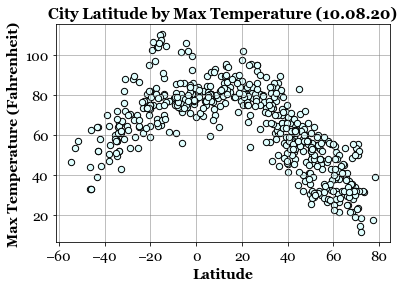

In [13]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Max Temperature", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Max Temperature (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Max Temperature (Fahrenheit)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig("Figures/fig1.png")
plt.show

## Description
There appears to be a curvilinear relatinship between city latitude and the maximum temperature. The maximum temperatures decrease as geographic location becomes further away from the equator (this is true in both directions -- going further south and north). The max temperatures are highest close to the equator.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

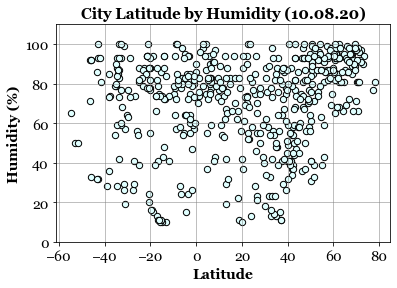

In [14]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Humidity", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Humidity (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Humidity (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.ylim(0, 110)
plt.savefig("Figures/fig2.png")
plt.show

## Description
There does not appear to be any linear relationship between city latitude and humidity. 

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

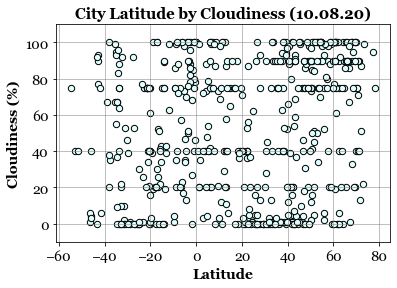

In [15]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Cloudiness", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Cloudiness (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Cloudiness (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.ylim(-10, 110)
plt.savefig("Figures/fig3.png")
plt.show

## Description
There does not appear to be any linear relationship between city latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

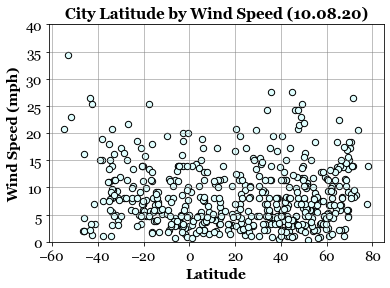

In [30]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Wind Speed", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Wind Speed (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Wind Speed (mph)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.ylim(0, 40)
plt.savefig("Figures/fig4.png")
plt.show

## Description
There does not appear to be any linear relationship between city latitude and wind speed.

## Linear Regression

Run linear regressions on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

In [17]:
northern_df = pd.DataFrame(cities_df.loc[cities_df['Latitude']>=0])
northern_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
5,Kapaa,40,US,1602181132,74,22.08,-159.32,80.6,6.93
6,Camacha,40,PT,1602181378,73,33.08,-16.33,73.4,6.93
7,Meadow Lake,1,US,1602181379,13,34.80,-106.54,77.0,5.44
12,Albany,54,US,1602181171,44,42.60,-73.97,59.0,1.01
13,Severo-Kuril'sk,41,RU,1602181379,80,50.68,156.12,46.2,16.35


In [18]:
southern_df = pd.DataFrame(cities_df.loc[cities_df['Latitude']<0])
southern_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,New Norfolk,77,AU,1602181378,93,-42.78,147.06,52.00,1.21
1,Geraldton,1,AU,1602181378,93,-28.77,114.60,53.60,8.05
2,Illapel,2,CL,1602181378,29,-31.63,-71.17,75.87,9.31
3,Ekangala,0,ZA,1602181378,56,-25.70,28.75,69.80,5.82
4,Busselton,88,AU,1602181378,73,-33.65,115.33,52.00,5.53


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression value is -0.84.
The r-squared is: 0.7022975368464384.
The p-value for this relationship is 0.0.


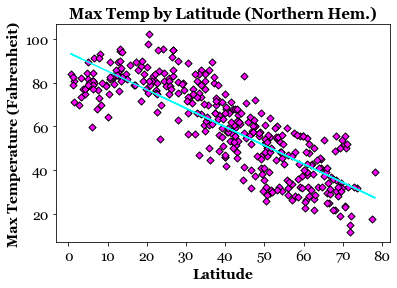

In [31]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Max Temp by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Max Temperature (Fahrenheit)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant negative relationship between latitude and maximum temperature for cities in the nothern hemisphere, p < .05. As geographic location increases further to the north (starting from the equator), temperature decreases. This relationship is strong, as latitude accounts for over 70% of the variance in temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression value is 0.63.
The r-squared is: 0.3995910197116954.
The p-value for this relationship is 0.0.


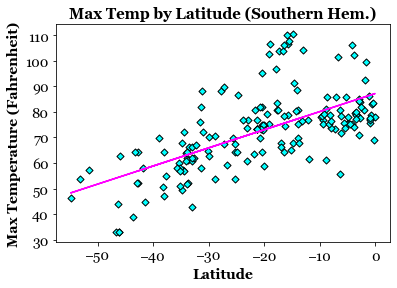

In [20]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Max Temp by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Max Temperature (Fahrenheit)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant positive relationship between latitude and maximum temperature for cities in the southern hemisphere, p < .05. As geographic location becomes closer to the equator (starting from the south), temperature increases. This is a moderate relationship, as latitude acccounts for approximately 40% of the variance in temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression value is 0.27.
The r-squared is: 0.07090102223753449.
The p-value for this relationship is 0.0.


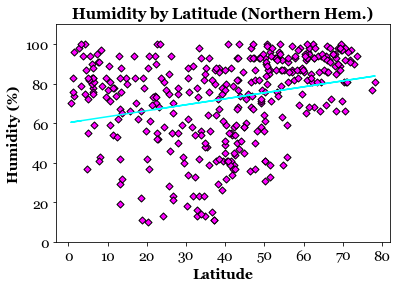

In [21]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Humidiy (%))')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Humidity by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Humidity (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(0, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant positive relationship between latitude and humidity for cities in the northern hemisphere, p < .05. As geographic location moves further to the north (starting from the equator), humidity increases. This relationship is weak, as latitude accounts for only 7% of the variance in humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression value is -0.02.
The r-squared is: 0.00031604006213963964.
The p-value for this relationship is 0.82.


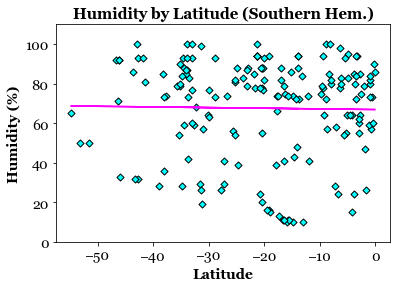

In [22]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Humidity by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Humidity (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(0, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is no statistical relationship between latitude and humidity for cities in the southern hemisphere, p > .05.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression value is 0.22.
The r-squared is: 0.05017338255560662.
The p-value for this relationship is 0.0.


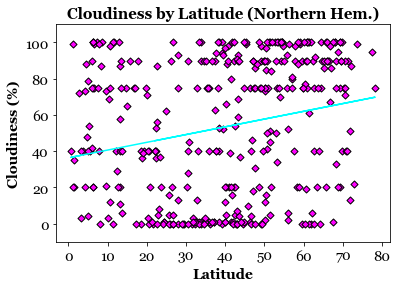

In [23]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Cloudiness by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Cloudiness (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-10, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant positive relationship between latitude and cloudiness for cities in the northern hemisphere, p < .05. As geographic location moves further to the north (starting from the equator), cloudiness increases. This relationship is weak, as latitude accounts for only 5% of the variance in cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression value is 0.25.
The r-squared is: 0.06025218197750789.
The p-value for this relationship is 0.0.


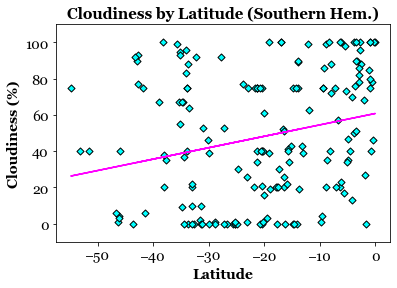

In [24]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Cloudiness by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Cloudiness (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-10, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant positive relationship between latitude and cloudiness for cities in the southern hemisphere, p < .05. As geographic location becomes closer to the equator (starting from the south), cloudiness increases. This relationship is weak, as latitude only accounts for approximately 6 percent of the variance in cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression value is 0.15.
The r-squared is: 0.023484675715655025.
The p-value for this relationship is 0.0.


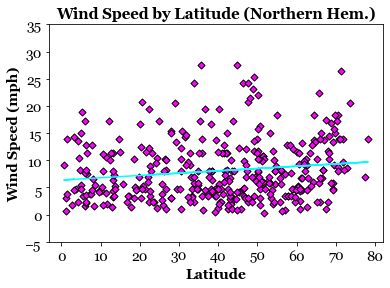

In [25]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Wind Speed by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Wind Speed (mph)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-5, 35)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant positive relationship between latitude and wind speed for cities in the northern hemisphere, p < .05. As geographic location increases towards the north (starting from the equator), wind speed increases. This relationship is weak, as latitude accounts for only 2.3% of the variance in wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression value is -0.24.
The r-squared is: 0.059683904196280946.
The p-value for this relationship is 0.0.


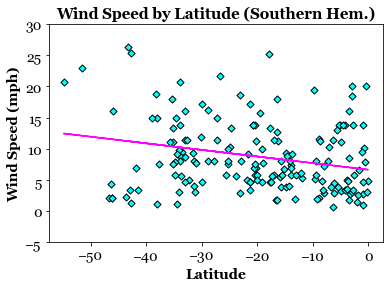

In [26]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Wind Speed by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Wind Speed (mph)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-5, 30)
plt.show

# Regression coefficient & p-value
print(f"The regression value is {round(rvalue,2)}.")
print(f"The r-squared is: {rvalue**2}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

## Description
There is a statistically significant negative relationship between latitude and wind speed for cities in the southern hemisphere, p < .05. As geographic location  moves closer to the equator (starting from the south), wind speed decreases. This relationship is weak, as latitude accounts for only 5.9% of the variance in wind speed.

## Final Observations
